In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('SSH-Bruteforce.csv')

In [3]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,2567078,16,16,1096,2261.0,272,0,68.500000,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,0,0,112642740,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,186.676190,56300000.0,56300000.0,Benign
2,22,6,1331500,13,11,1244,1969.0,736,0,95.692308,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
3,0,0,112642748,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,86.267027,56300000.0,56300000.0,Benign
4,0,0,112639904,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign


In [4]:
df.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625919 entries, 0 to 625918
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           625919 non-null  int64  
 1   Protocol           625919 non-null  int64  
 2   Flow Duration      625919 non-null  int64  
 3   Tot Fwd Pkts       625919 non-null  int64  
 4   Tot Bwd Pkts       625919 non-null  int64  
 5   TotLen Fwd Pkts    625919 non-null  int64  
 6   TotLen Bwd Pkts    625919 non-null  float64
 7   Fwd Pkt Len Max    625919 non-null  int64  
 8   Fwd Pkt Len Min    625919 non-null  int64  
 9   Fwd Pkt Len Mean   625919 non-null  float64
 10  Fwd Pkt Len Std    625919 non-null  float64
 11  Bwd Pkt Len Max    625919 non-null  int64  
 12  Bwd Pkt Len Min    625919 non-null  int64  
 13  Bwd Pkt Len Mean   625919 non-null  float64
 14  Bwd Pkt Len Std    625919 non-null  float64
 15  Flow Byts/s        625919 non-null  int64  
 16  Fl

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dst Port,625919.0,9.539225e+03,1.953115e+04,0.0,22.0,80.0,3389.0,65533.0
Protocol,625919.0,8.025289e+00,4.387315e+00,0.0,6.0,6.0,6.0,17.0
Flow Duration,625919.0,9.982785e+06,2.812546e+07,0.0,208.0,46167.0,1787891.5,119999980.0
Tot Fwd Pkts,625919.0,7.695050e+00,5.222881e+01,1.0,1.0,3.0,9.0,14584.0
Tot Bwd Pkts,625919.0,8.185545e+00,1.317208e+02,0.0,1.0,1.0,7.0,33366.0
...,...,...,...,...,...,...,...,...
Active Min,625919.0,5.329410e+04,1.174904e+06,0.0,0.0,0.0,0.0,114000000.0
Idle Mean,625919.0,3.940072e+06,1.548504e+07,0.0,0.0,0.0,0.0,119822490.0
Idle Std,625919.0,1.028778e+05,1.416178e+06,0.0,0.0,0.0,0.0,69200000.0
Idle Max,625919.0,4.027403e+06,1.566968e+07,0.0,0.0,0.0,0.0,119822490.0


In [7]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


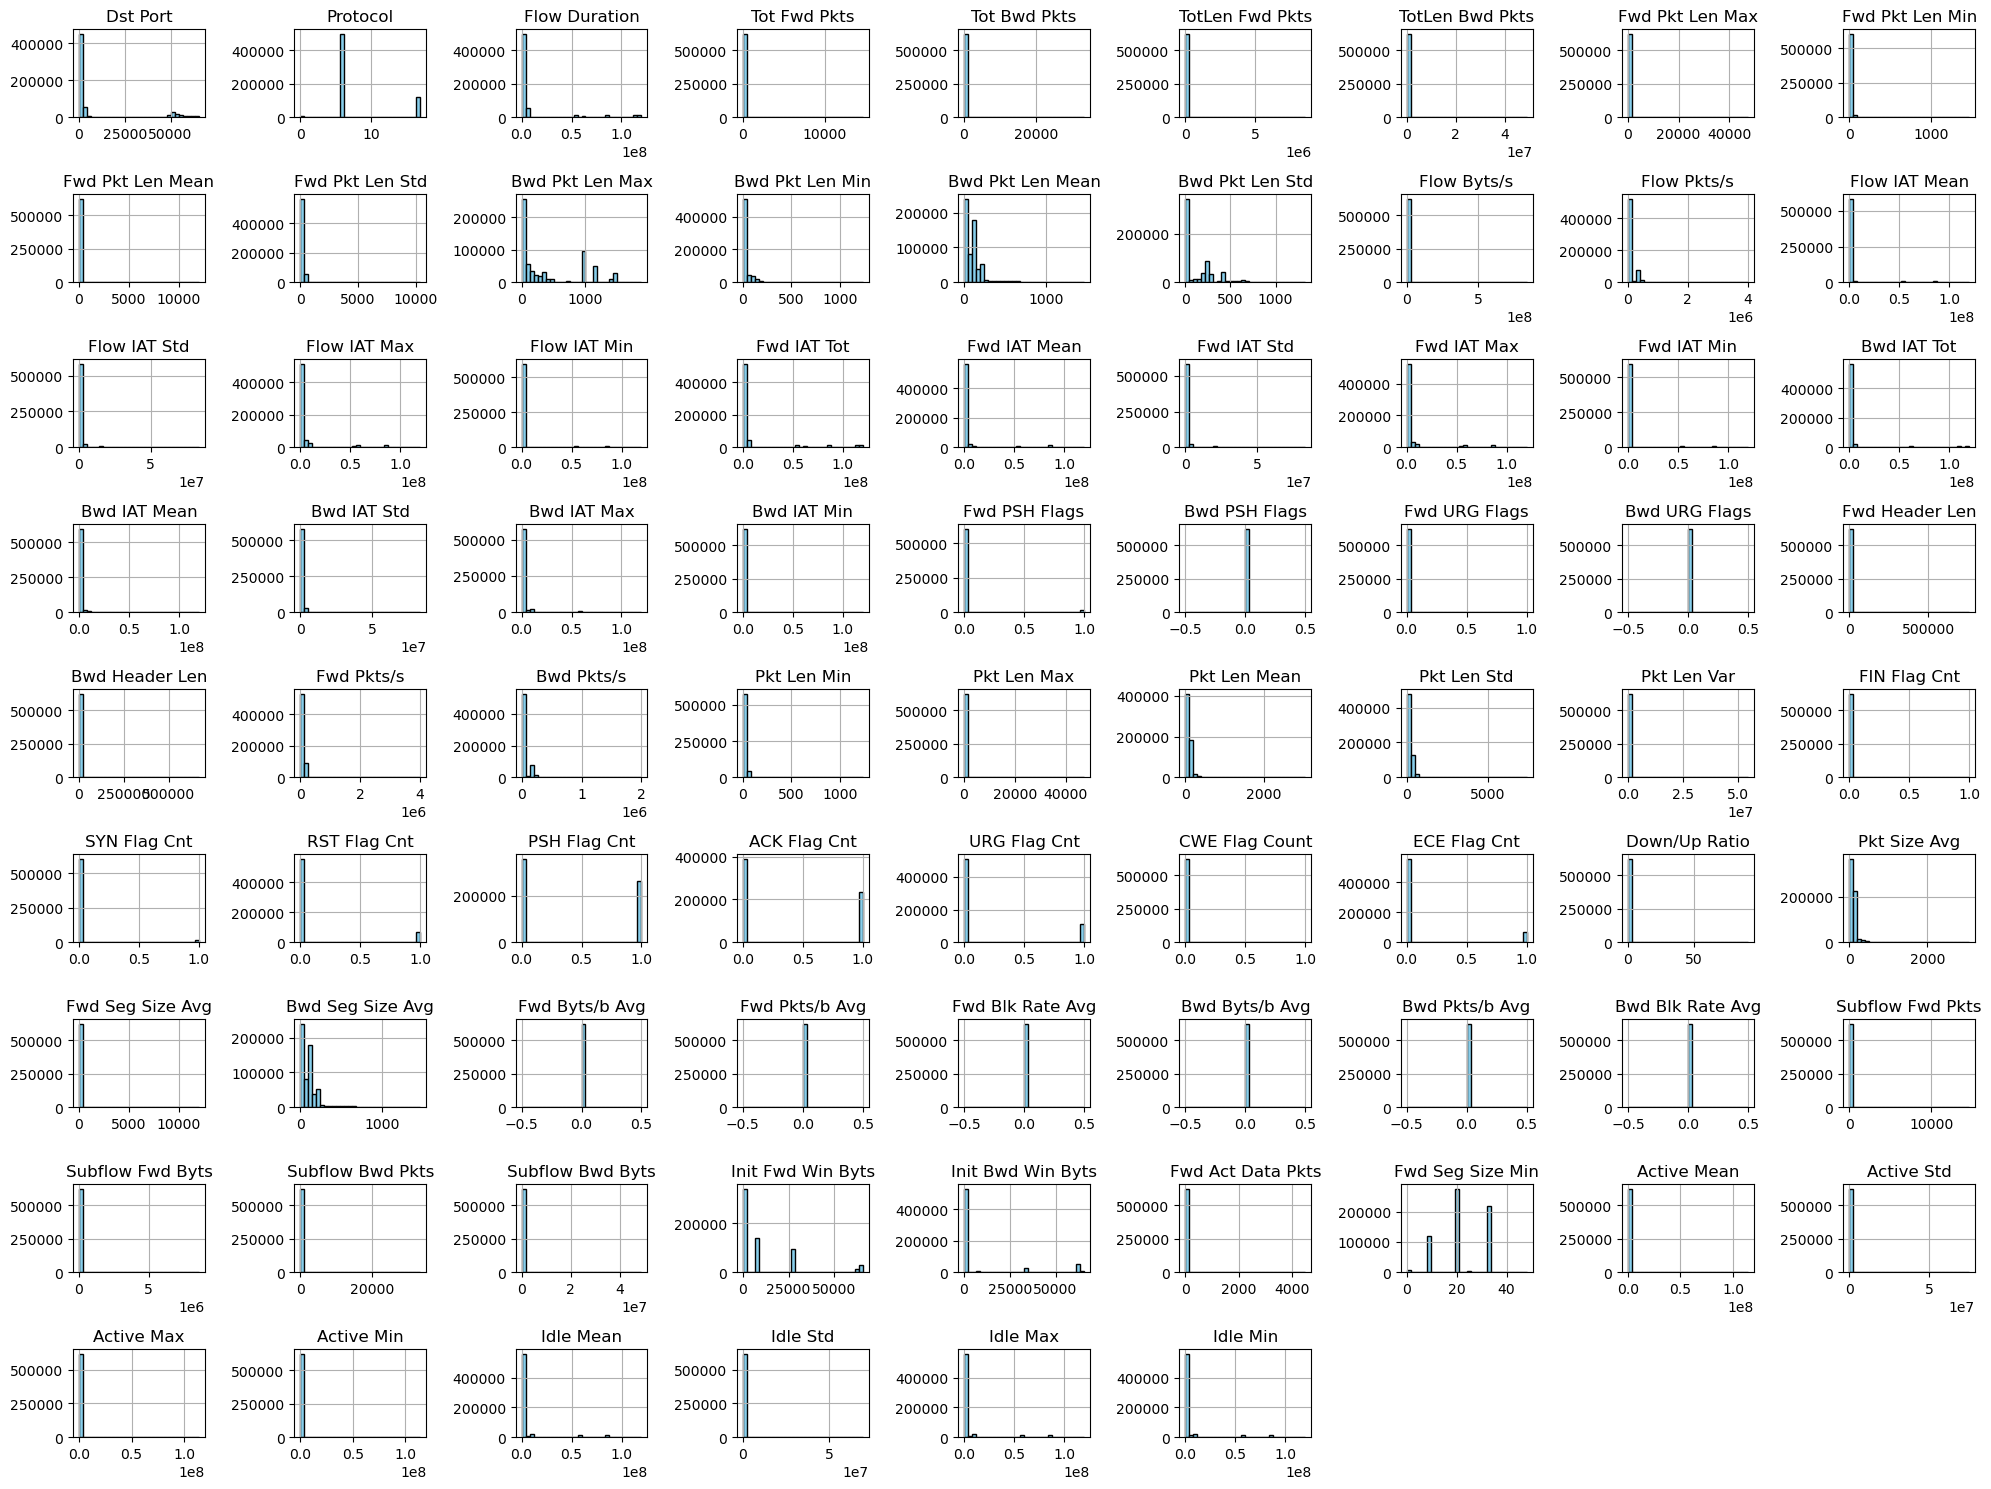

In [8]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Histograms for all numeric columns
df[numeric_columns].hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

Label
Benign            438330
SSH-Bruteforce    187589
Name: count, dtype: int64


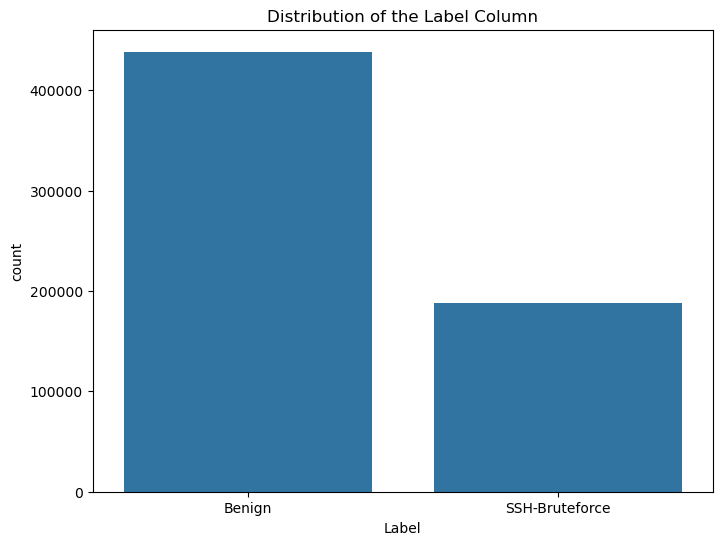

In [9]:
print(df['Label'].value_counts())

# Visualize the count of each class in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of the Label Column')
plt.show()

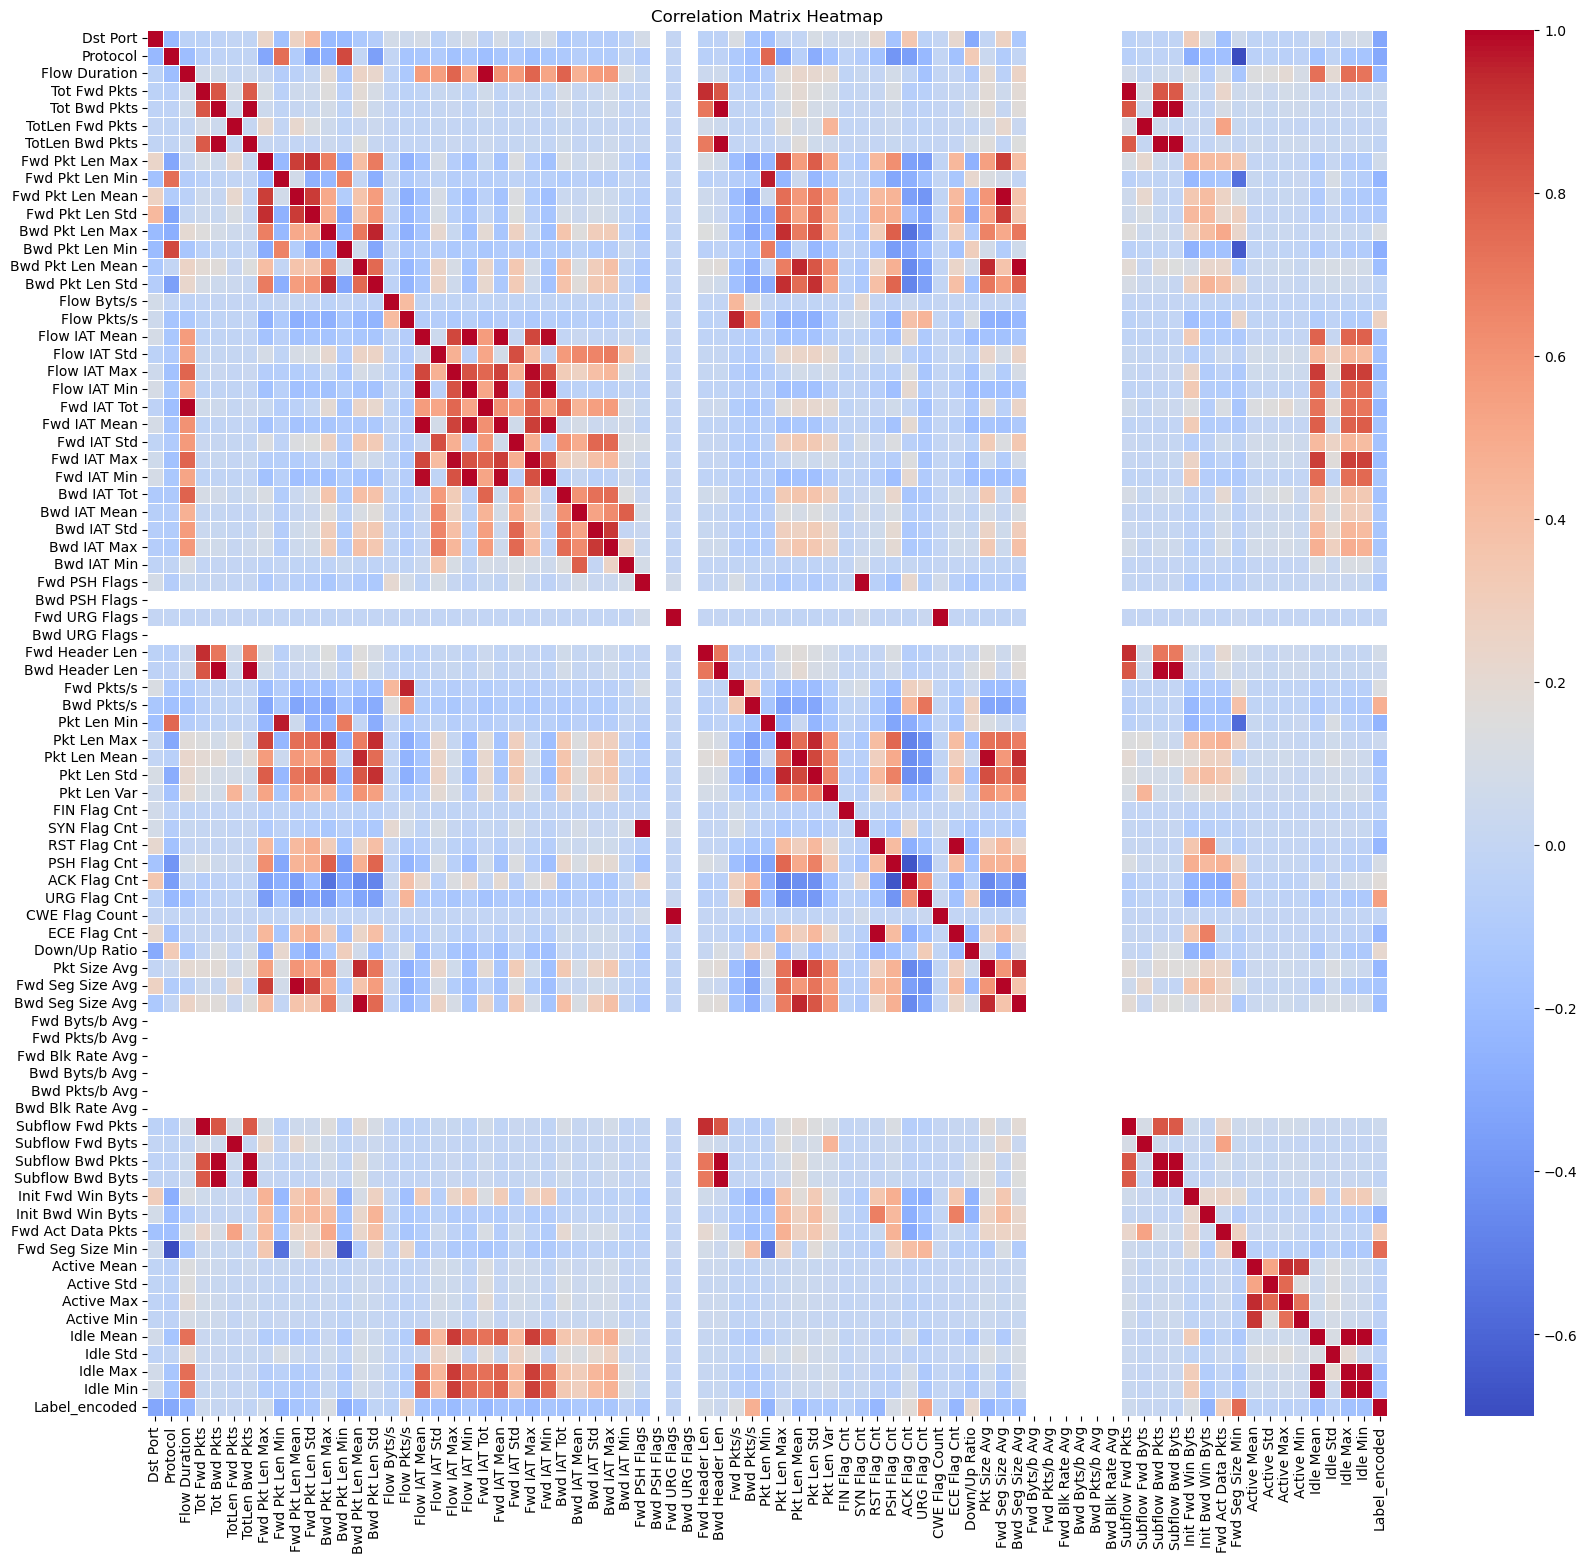

In [10]:
from sklearn.preprocessing import LabelEncoder
# Compute the correlation matrix
df1 = df.copy(deep=True)

# Encode the 'Label' column in df1
label_encoder = LabelEncoder()
df1['Label_encoded'] = label_encoder.fit_transform(df1['Label'])

# Drop non-numeric columns
df1_numeric = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df1_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [11]:
# Display the features most correlated with the encoded 'Label' column
correlation_with_label = correlation_matrix['Label_encoded'].sort_values(ascending=False)
print("Top 10 features most positively correlated with the Label:")
print(correlation_with_label.head(10))

Top 10 features most positively correlated with the Label:
Label_encoded        1.000000
Fwd Seg Size Min     0.749262
URG Flag Cnt         0.544934
Bwd Pkts/s           0.473295
Fwd Act Data Pkts    0.308682
Flow Pkts/s          0.269018
Down/Up Ratio        0.211629
ACK Flag Cnt         0.170428
Fwd Pkts/s           0.132322
Bwd Pkt Len Max      0.117615
Name: Label_encoded, dtype: float64


In [12]:

print("\nTop 10 features most negatively correlated with the Label:")
print(correlation_with_label.tail(10))


Top 10 features most negatively correlated with the Label:
Protocol           -0.301989
Dst Port           -0.318776
Bwd PSH Flags            NaN
Bwd URG Flags            NaN
Fwd Byts/b Avg           NaN
Fwd Pkts/b Avg           NaN
Fwd Blk Rate Avg         NaN
Bwd Byts/b Avg           NaN
Bwd Pkts/b Avg           NaN
Bwd Blk Rate Avg         NaN
Name: Label_encoded, dtype: float64


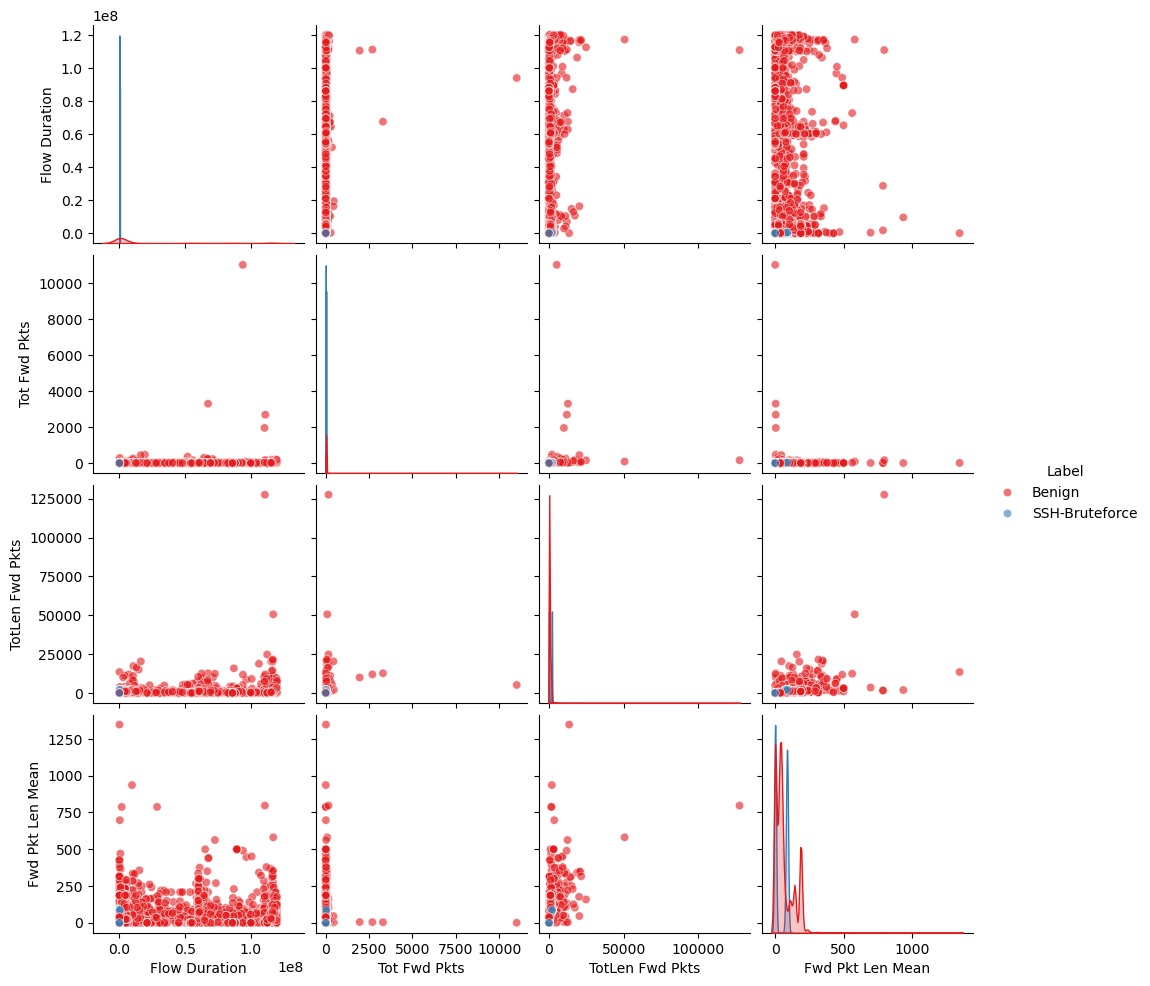

In [13]:
# Sample data to avoid heavy computation
sample_df = df.sample(frac=0.05, random_state=42)

# Select a few features to visualize relationships
selected_features = ['Flow Duration', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Mean', 'Label']

# Plot pairplot
sns.pairplot(sample_df[selected_features], hue='Label', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()


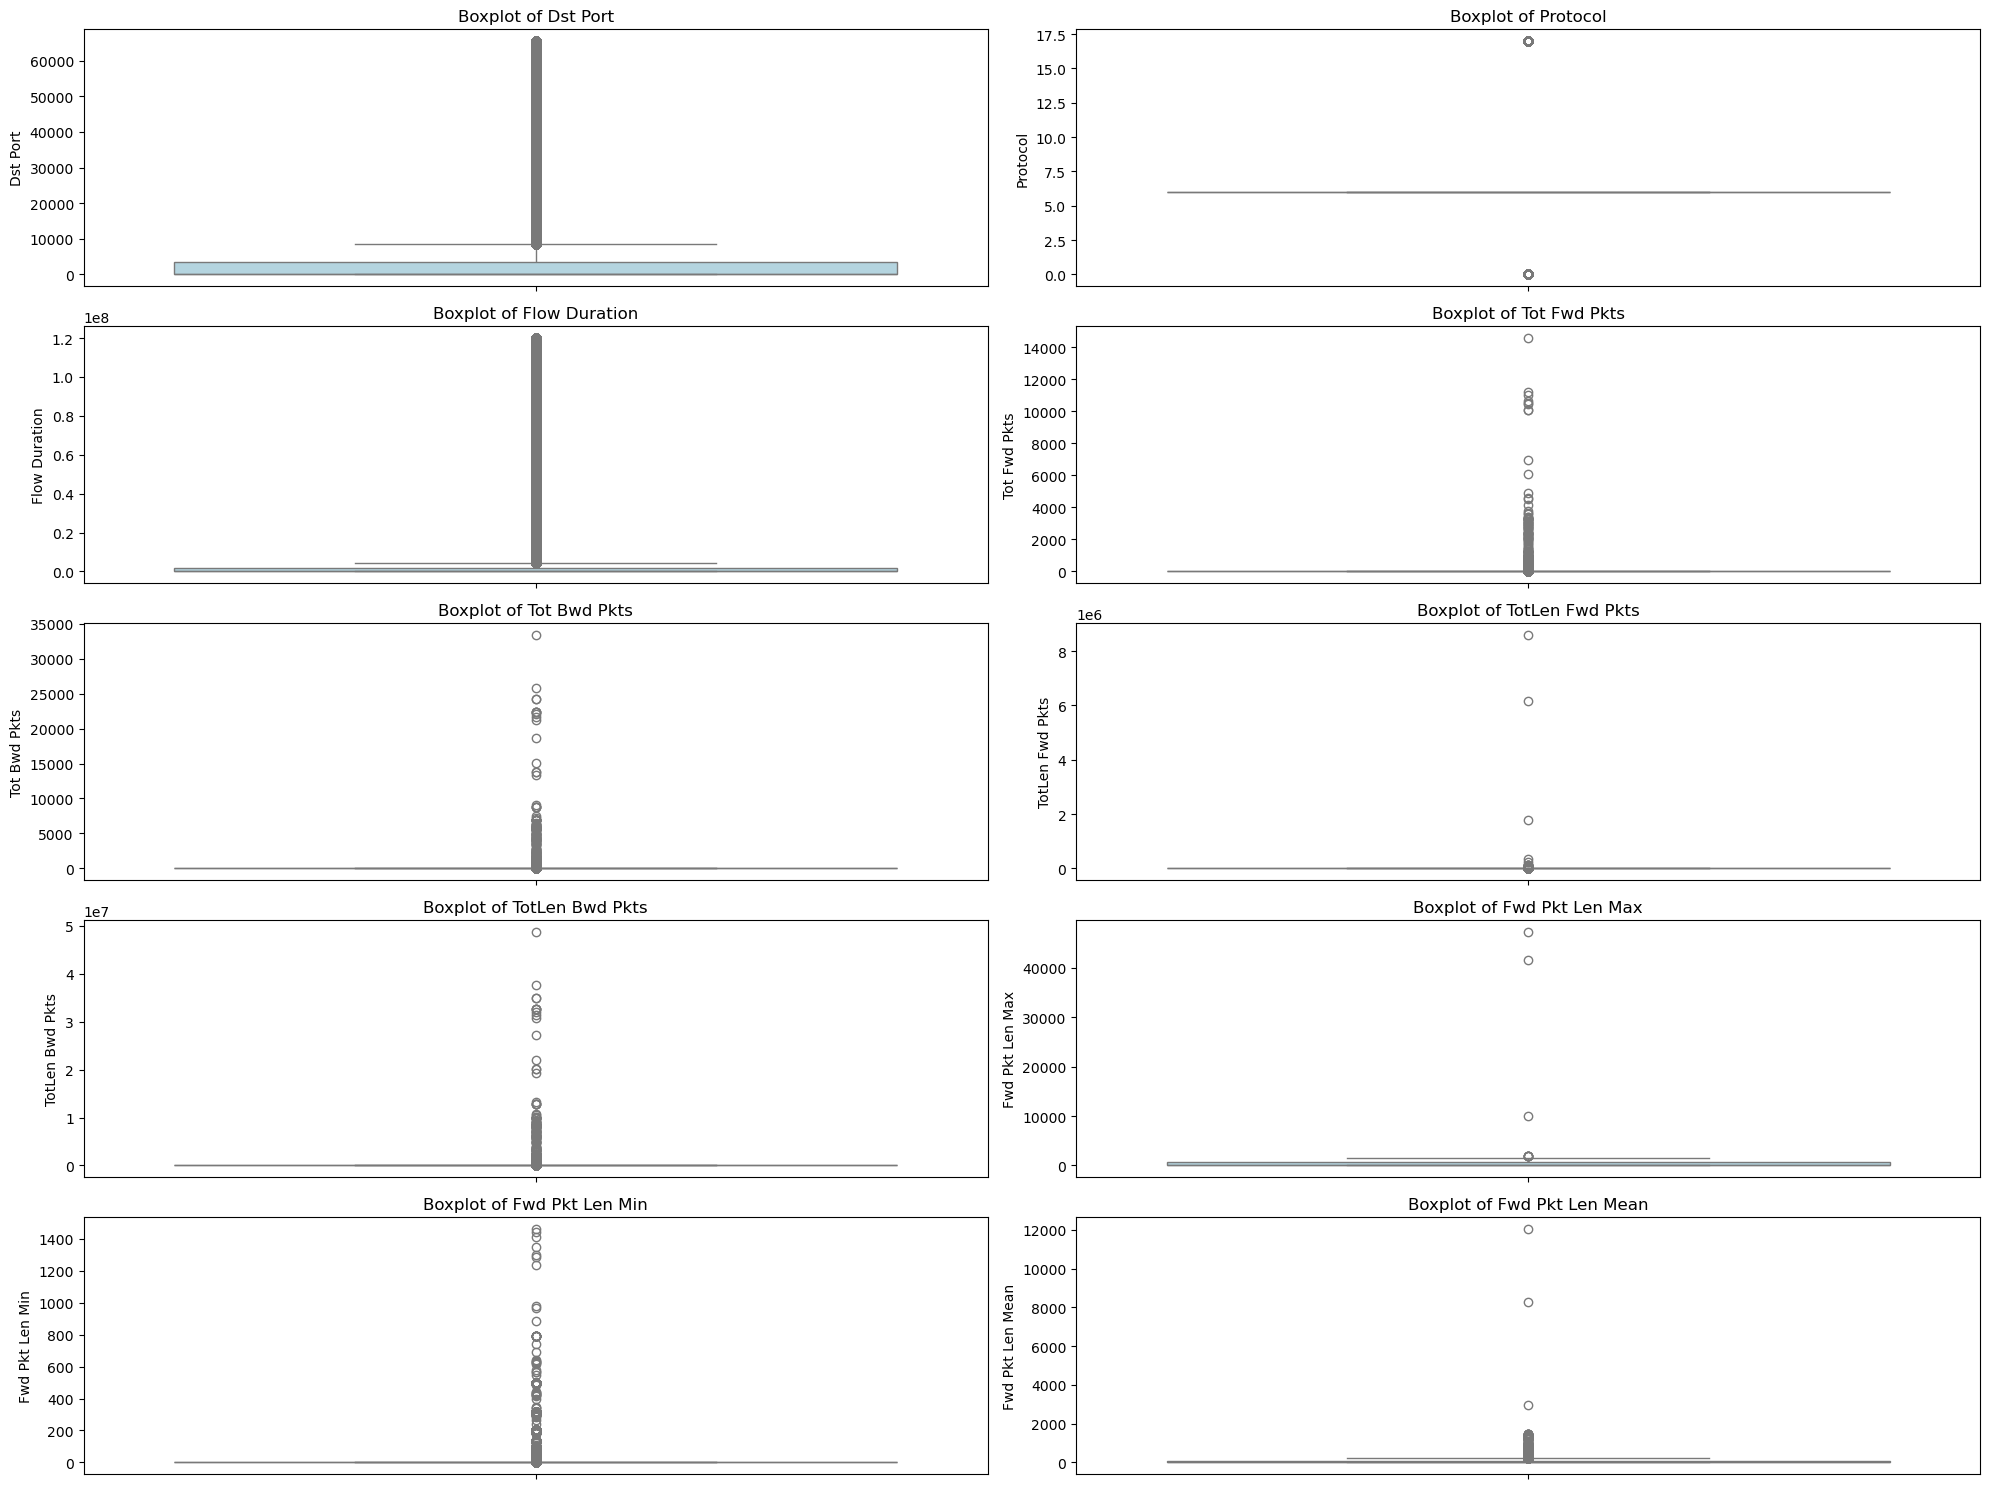

In [14]:
# Plot boxplots to detect outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns[:10], 1):  # Visualize only the first 10 numeric columns
    plt.subplot(5, 2, i)
    sns.boxplot(y=column, data=df, color='lightblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [15]:
# Get categorical columns (excluding 'Label')
categorical_columns = df.select_dtypes(include='object').columns.drop('Label')

# Visualize count plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Count plot of {column}')
    plt.show()


# Feature Extraction

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

In [4]:
# Encode target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for LDA and autoencoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest for feature extraction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 25 important features
print("Top 25 important features:")
for i in range(25):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# Plot feature importances for the top 25 features
plt.figure(figsize=(12, 6))
plt.title("Top 25 Feature Importance")
plt.bar(range(25), importances[indices[:25]], align='center')  # Adjusted to 25
plt.xticks(range(25), X.columns[indices[:25]], rotation=45)  # Adjusted to 25
plt.tight_layout()
plt.show()


## Recursive Feature Elimination (RFE)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder

# # Example data preprocessing
# # Check if there are categorical variables and encode them
# for col in X_train.columns:
#     if X_train[col].dtype == 'object':
#         le = LabelEncoder()
#         X_train[col] = le.fit_transform(X_train[col])
#         X_test[col] = le.transform(X_test[col])

# # RFE with Random Forest as the estimator
# rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), n_features_to_select=25)
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[rfe.support_]
# print("Selected features by RFE:")
# print(selected_features)

# # Create a DataFrame to visualize feature rankings
# feature_ranking = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Rank': rfe.ranking_
# })

# # Sort the features based on their rank
# feature_ranking = feature_ranking.sort_values(by='Rank')

# # Plot the top features
# plt.figure(figsize=(12, 6))
# plt.barh(feature_ranking['Feature'], feature_ranking['Rank'], color='skyblue')
# plt.title("Feature Rankings from RFE with Random Forest")
# plt.xlabel("Rank")
# plt.ylabel("Features")
# plt.gca().invert_yaxis()  # Invert y-axis to have the highest rank at the top
# plt.tight_layout()
# plt.show()

# Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_scaled is already defined
input_dim = X_train_scaled.shape[1]
encoding_dim = 20  # Adjust this as needed

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with fewer epochs and early stopping
autoencoder.fit(X_train_scaled, X_train_scaled, 
                epochs=50,              # You can reduce this further for testing
                batch_size=128,         # Adjusted batch size for potentially faster training
                validation_split=0.2, 
                callbacks=[early_stopping],  # Use early stopping
                verbose=1)

# Extract the encoder part
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Get the weights of the encoder layer
encoder_weights = autoencoder.get_weights()[0]
# Access weights directly from the encoder layer

# Create a DataFrame for feature importance based on weights
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': np.abs(encoder_weights).sum(axis=1)  # Sum of absolute weights for each feature
})

# Sort features by absolute weight
feature_importance = feature_importance.sort_values(by='Weight', ascending=False)

# Select top 25 features
top_features = feature_importance.head(25)

# Print top 25 features
print("Top 25 features by encoder weights:")
print(top_features[['Feature', 'Weight']])

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Weight'], color='skyblue')
plt.title("Top 25 Features by Encoder Weights")
plt.xlabel("Absolute Weight Value")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right')   # Invert y-axis to have the highest on top
plt.tight_layout()
plt.show()

# Transform the features
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)

print(f"Encoded features shape: {X_train_encoded.shape}")


# Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA to reduce dimensions
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

# Print the transformed feature shape
print(f"LDA transformed feature shape: {X_train_lda.shape}")

# Get the LDA coefficients
lda_coefficients = lda.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lda_coefficients
})

# Sort features by absolute value of coefficients
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 25 features
top_features = feature_importance.head(25)

# Print top 25 features
print("Top 25 features by LDA coefficients:")
print(top_features[['Feature', 'Coefficient']])

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Abs_Coefficient'], color='skyblue')
plt.title("Top 25 Features by LDA Coefficient Magnitudes")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
